<a href="https://colab.research.google.com/github/Swathi04/Assignment_CMPE_255_Clustering/blob/main/Hierarchial_Clustering_CMPE_255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hierarchical Clustering

SUBMITTED BY: SWATHI ANANDRAM

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:[1]

Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

##Necessary Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 

##Load Data

In [9]:
data_frame = pd.read_csv('Mall_Customers.csv')
data_frame

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
X = data_frame[['Annual Income (k$)', 'Spending Score (1-100)']]

Before running k-means, it is beneficial to rescale each feature dimension of the observation set by its standard deviation (i.e. “whiten” it - as in “white noise” where each frequency has equal power). Each feature is divided by its standard deviation across all observations to give it unit variance.

In [15]:
from scipy.cluster.vq import whiten

X['x_scaled'] = whiten(X['Annual Income (k$)'])
X['y_scaled'] = whiten(X['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##Clustering

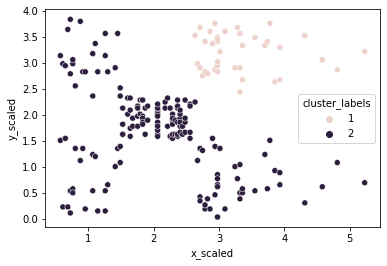

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage()
distance_matrix = linkage(X[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# Assign cluster labels
X['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=X);

##Visualization as dendogram

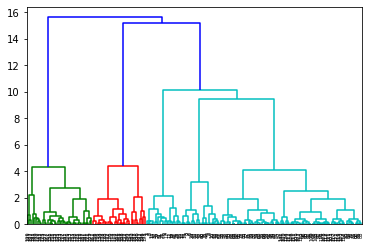

In [17]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)

##Agglomerative Clustering

In [19]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
AgglomerativeClustering(n_clusters=3)

AgglomerativeClustering(n_clusters=3)

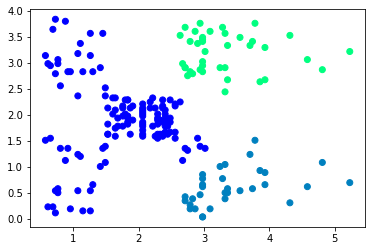

In [21]:
plt.scatter(X['x_scaled'], 
            X['y_scaled'],
            c = AgglomerativeClustering(n_clusters = 3).fit_predict(X), cmap =plt.cm.winter) 

plt.show() 